# Datathon - Linkedin

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm
tqdm.pandas()

SEED = 42

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

cat_feat_colors = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]
colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]

In [2]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [3]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))

    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)

In [37]:
train = pd.read_csv("../data/train_users.csv")

In [38]:
test = pd.read_csv("../data/test_users.csv")

In [39]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(53019, 4)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id              int64
industry            object
location            object
moved_after_2019     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location  \
0     1301  Information Technology and Services  Istanbul, Istanbul, Turkey   
1     6950                             Internet  Istanbul, Istanbul, T

In [ ]:
check_df(test)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(13255, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id      int64
industry    object
location    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location
0    17449                             Research                      Turkey
1    33967                    Computer Software  Istanbul, Istanbul, Turkey
2     2110                           Automotive    

####################################################################################################
0    32496
1    20523
Name: moved_after_2019, dtype: int64
####################################################################################################


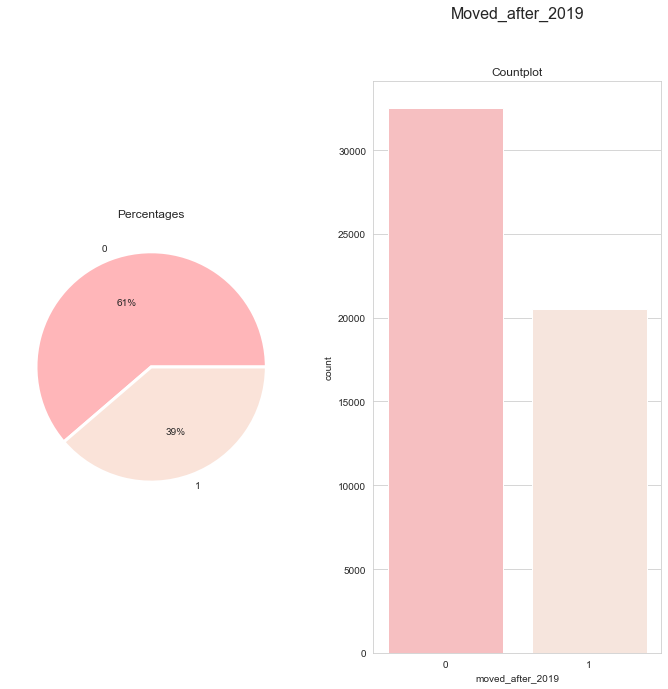

In [ ]:
cat_plots(train, "moved_after_2019")

In [41]:
province={
"1.0" : "Adana",
"2.0" : "Adıyaman",
"3.0" : "Afyonkarahisar",
"4.0" : "Ağrı",
"5.0" : "Amasya",
"6.0" : "Ankara",
"7.0" : "Antalya",
"8.0" : "Artvin",
"9.0" : "Aydın",
"10.0" : "Balıkesir",
"11.0" : "Bilecik",
"12.0" : "Bingöl",
"13.0" : "Bitlis",
"14.0" : "Bolu",
"15.0" : "Burdur",
"16.0" : "Bursa",
"17.0" : "Çanakkale",
"18.0" : "Çankırı",
"19.0" : "Çorum",
"20.0" : "Denizli",
"21.0" : "Diyarbakır",
"22.0" : "Edirne",
"23.0" : "Elâzığ",
"24.0" : "Erzincan",
"25.0" : "Erzurum",
"26.0" : "Eskişehir",
"27.0" : "Gaziantep",
"28.0" : "Giresun",
"29.0" : "Gümüşhane",
"30.0" : "Hakkâri",
"31.0" : "Hatay",
"32.0" : "Isparta",
"33.0" : "Mersin",
"34.0" : "İstanbul",
"35.0" : "İzmir",
"36.0" : "Kars",
"37.0" : "Kastamonu",
"38.0" : "Kayseri",
"39.0" : "Kırklareli",
"40.0" : "Kırşehir",
"41.0" : "Kocaeli",
"42.0" : "Konya",
"43.0" : "Kütahya",
"44.0" : "Malatya",
"45.0" : "Manisa",
"46.0" : "Kahramanmaraş",
"47.0" : "Mardin",
"48.0" : "Muğla",
"49.0" : "Muş",
"50.0" : "Nevşehir",
"51.0" : "Niğde",
"52.0" : "Ordu",
"53.0" : "Rize",
"54.0" : "Sakarya",
"55.0" : "Samsun",
"56.0" : "Siirt",
"57.0" : "Sinop",
"58.0" : "Sivas",
"59.0" : "Tekirdağ",
"60.0" : "Tokat",
"61.0" : "Trabzon",
"62.0" : "Tunceli",
"63.0" : "Şanlıurfa",
"64.0" : "Uşak",
"65.0" : "Van",
"66.0" : "Yozgat",
"67.0" : "Zonguldak",
"68.0" : "Aksaray",
"69.0" : "Bayburt",
"70.0" : "Karaman",
"71.0" : "Kırıkkale",
"72.0" : "Batman",
"73.0" : "Şırnak",
"74.0" : "Bartın",
"75.0" : "Ardahan",
"76.0" : "Iğdır",
"77.0" : "Yalova",
"78.0" : "Karabük",
"79.0" : "Kilis",
"80.0" : "Osmaniye",
"81.0" : "Düzce"
}


In [42]:
import swifter
from unidecode import unidecode

def check_string(string_to_check):
    string_to_check = unidecode(str(string_to_check).lower())
    if "," in string_to_check:
        sub = string_to_check.split(", ")
    else:
        sub = string_to_check.split()

    sub_dict = dict((v,unidecode(k.lower())) for v, k in province.items())

    for val in sub:
        if val in sub_dict.values():
            return val
        else:
            continue
        
    if "turkey" in sub:
        return "turkey"
    else:
        return (val + " yurtdisi")


#df['result'] = df['string_to_check'].apply(check_string)

In [43]:
train["user_location"] = train["location"].swifter.apply(check_string)
test["user_location"] = test["location"].swifter.apply(check_string)


Pandas Apply:   0%|          | 0/53019 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/13255 [00:00<?, ?it/s]

In [45]:
train["user_location"] = train["user_location"].replace(['kingdom yurtdisi','states yurtdisi'],['united kingdom yurtdisi', 'united states yurtdisi'])
test["user_location"] = test["user_location"].replace(['kingdom yurtdisi','states yurtdisi'],['united kingdom yurtdisi', 'united states yurtdisi'])


In [47]:
train.loc[train['user_location'].str.contains('yurtdisi'), 'is_yurtdisi'] = 1
train.loc[~train['user_location'].str.contains('yurtdisi'), 'is_yurtdisi'] = 0

test.loc[test['user_location'].str.contains('yurtdisi'), 'is_yurtdisi'] = 1
test.loc[~test['user_location'].str.contains('yurtdisi'), 'is_yurtdisi'] = 0

In [52]:
train.drop(columns="location", inplace=True)
test.drop(columns="location", inplace=True)

In [53]:
app_train = pd.get_dummies(train)
app_test = pd.get_dummies(test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 238)
Testing Features shape:  (13255, 194)


In [54]:
labels = app_train["moved_after_2019"]

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['moved_after_2019'] = labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 195)
Testing Features shape:  (13255, 194)


In [55]:
correlations = app_train.corr()['moved_after_2019'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 industry_Fine Art                               0.009466
industry_Financial Services                     0.010671
user_location_philippines yurtdisi              0.012220
industry_Think Tanks                            0.012306
industry_Higher Education                       0.012504
industry_Restaurants                            0.013197
user_location_ankara                            0.015855
industry_Entertainment                          0.017716
industry_Aviation & Aerospace                   0.019422
industry_Political Organization                 0.020450
industry_Defense & Space                        0.029694
industry_Information Technology and Services    0.036407
industry_Internet                               0.037546
user_location_istanbul                          0.068572
moved_after_2019                                1.000000
Name: moved_after_2019, dtype: float64

Most Negative Correlations:
 user_location_turkey                           

In [61]:
app_train["is_yurtdisi"] = app_train["is_yurtdisi"].astype(np.uint8)


In [64]:
app_test["is_yurtdisi"] = app_test["is_yurtdisi"].astype(np.uint8)


In [66]:
app_train.to_csv("train_user_revise.csv", index=False)
app_test.to_csv("test_user_revise.csv", index=False)

# Language.csv

In [72]:
train = pd.read_csv("./train_user_revise.csv")
test = pd.read_csv("./test_user_revise.csv")

In [73]:
languages = pd.read_csv("../data/languages.csv")

In [74]:
check_df(languages)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(76062, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id         int64
language       object
proficiency    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id   language          proficiency
0        8  İngilizce    full_professional
1        8     Türkçe  native_or_bilingual
2        8  Fransızca           elementary
3       10  ingilizce                  NaN
4       11    Turkish  native_or_bilingual
************

In [78]:
from unidecode import unidecode
import swifter

def fix_language(lang):
    lang = unidecode(str(lang).lower())
    return lang

languages["language"] = languages["language"].swifter.apply(fix_language)

Pandas Apply:   0%|          | 0/76062 [00:00<?, ?it/s]

In [79]:
languages["language"] = languages["language"].replace(["english","turkish", "german", "spanish", "french", "russian", "arabic", "italian", "japanese"],["ingilizce", "turkce", "almanca", "ispanyolca", "fransizca", "rusca", "arapca", "italyanca", "japonca"])


In [80]:
languages.loc[languages['language'].str.contains('turk'), 'language'] = 'turkce'
languages.loc[languages['language'].str.contains('isp'), 'language'] = 'ispanyolca'
languages.loc[languages['language'].str.contains('ing'), 'language'] = 'ingilizce'
languages.loc[languages['language'].str.contains('alm'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('kore'), 'language'] = 'korece'
languages.loc[languages['language'].str.contains('deut'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('cin'), 'language'] = 'cince'
languages.loc[languages['language'].str.contains('chin'), 'language'] = 'cince'
languages.loc[languages['language'].str.contains('eng'), 'language'] = 'ingilizce'
languages.loc[languages['language'].str.contains('kurd'), 'language'] = 'kurtce'
languages.loc[languages['language'].str.contains('azer'), 'language'] = 'azerice'
languages.loc[languages['language'].str.contains('pers'), 'language'] = 'persian'


In [81]:
languages.loc[languages['language'].str.contains('bulg'), 'language'] = 'bulgarca'
languages.loc[languages['language'].str.contains('leh'), 'language'] = 'lehce'
languages.loc[languages['language'].str.contains('greek'), 'language'] = 'greek'
languages.loc[languages['language'].str.contains('pol'), 'language'] = 'polish'
languages.loc[languages['language'].str.contains('espa'), 'language'] = 'ispanyolca'
languages.loc[languages['language'].str.contains('fars'), 'language'] = 'farsca'
languages.loc[languages['language'].str.contains('port'), 'language'] = 'portekizce'
languages.loc[languages['language'].str.contains('lati'), 'language'] = 'latince'
languages.loc[languages['language'].str.contains('ger'), 'language'] = 'almanca'
languages.loc[languages['language'].str.contains('fran'), 'language'] = 'fransizca'
languages.loc[languages['language'].str.contains('kazak'), 'language'] = 'kazakca'
languages.loc[languages['language'].str.contains('rus'), 'language'] = 'rusca'
languages.loc[languages['language'].str.contains('bos'), 'language'] = 'bosnakca'
languages.loc[languages['language'].str.contains('yun'), 'language'] = 'greek'
languages.loc[languages['language'].str.contains('isvec'), 'language'] = 'swedish'
languages.loc[languages['language'].str.contains('sig'), 'language'] = 'isaret dilleri'



In [82]:
languages.loc[languages['language'].str.contains('serb'), 'language'] = 'sirpca'
languages.loc[languages['language'].str.contains('fin'), 'language'] = 'fince'
languages.loc[languages['language'].str.contains('fele'), 'language'] = 'dutch'
languages.loc[languages['language'].str.contains('cek'), 'language'] = 'czech'
languages.loc[languages['language'].str.contains('hung'), 'language'] = 'macarca'
languages.loc[languages['language'].str.contains('fre'), 'language'] = 'fransizca'
languages.loc[languages['language'].str.contains('ara'), 'language'] = 'arapca'
languages.loc[languages['language'].str.contains('isa'), 'language'] = 'isaret dilleri'
languages.loc[languages['language'].str.contains('ita'), 'language'] = 'italyanca'


In [86]:
mask = languages.language.map(languages.language.value_counts()) < 17
languages.language =  languages.language.mask(mask, 'other')

### Levels:
1. - No Proficiency
2. - Elementary Proficiency
3. - Limited Working Proficiency
4. - Professional Working Proficiency
5. - Full Professional Proficiency
6. - Native / Bilingual Proficiency

In [104]:
prof_dict = [{'col': 'proficiency', 
            'mapping': 
            {'nan': np.nan,
            'elementary':1,
            'limited_working':2,
            'professional_working':3,
            'full_professional': 4,
            'native_or_bilingual': 5}}]

In [105]:
from category_encoders import OrdinalEncoder
oe = OrdinalEncoder(mapping=prof_dict)

In [106]:
languages_encode = languages.copy()

In [107]:
languages_encode = oe.fit_transform(languages_encode)

In [108]:
languages_encode["proficiency"].replace(-1, 1, inplace = True)

In [4]:
def agg_numeric(df, group_var, df_name):
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    columns = [group_var]

    for var in agg.columns.levels[0]:
        if var != group_var:
            for stat in agg.columns.levels[1][:-1]:
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [113]:
language_agg = agg_numeric(languages_encode, group_var = 'user_id', df_name = 'language')
language_agg.head()

c:\Users\Furka\anaconda3\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,language_proficiency_count,language_proficiency_mean,language_proficiency_max,language_proficiency_min,language_proficiency_sum
0,8,3,3.333333,5.0,1.0,10.0
1,10,1,1.000000,1.0,1.0,1.0
2,11,3,4.333333,5.0,3.0,13.0
3,12,2,4.000000,5.0,3.0,8.0
4,13,2,3.000000,4.0,2.0,6.0


In [117]:
train = train.merge(language_agg, on = 'user_id', how = 'left')
train.head()


,user_id,is_yurtdisi,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziante

In [5]:
def target_corrs(df):

    corrs = []

    for col in df.columns:
        if (col != 'moved_after_2019') & (col != "user_id"):
            corr = df['moved_after_2019'].corr(df[col])

            corrs.append((col, corr))
            
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [121]:
target_corrs(train)

[('user_location_turkey', -0.06876162368272187),
 ('user_location_istanbul', 0.06857212998160997),
 ('language_proficiency_max', 0.05718929016362843),
 ('language_proficiency_sum', 0.050054250825388454),
 ('language_proficiency_count', 0.043201836440100345),
 ('language_proficiency_mean', 0.04296523013627315),
 ('industry_Internet', 0.03754552322489718),
 ('industry_Information Technology and Services', 0.03640684481617477),
 ('industry_Defense & Space', 0.02969372907846926),
 ('industry_Telecommunications', -0.02909732592573648),
 ('industry_-1', -0.02556157348315457),
 ('industry_Textiles', -0.021869904948957852),
 ('industry_Political Organization', 0.020450320978415933),
 ('industry_Computer Networking', -0.0196152740724031),
 ('industry_Aviation & Aerospace', 0.019421748957494912),
 ('industry_Food Production', -0.018770875157902978),
 ('industry_Entertainment', 0.017716193884278118),
 ('industry_Health, Wellness and Fitness', -0.016394703651856808),
 ('user_location_ankara', 0.01

In [6]:
def count_categorical(df, group_var, df_name):
    categorical = pd.get_dummies(df.select_dtypes('object'))

    categorical[group_var] = df[group_var]

    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    for var in categorical.columns.levels[0]:
        for stat in ['count', 'count_norm']:
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [149]:
categorical_grouped = count_categorical(languages_encode, "user_id", "language")
categorical_grouped.shape

(37290, 72)

In [150]:
categorical_grouped.head()

,language_language_albanian_count,language_language_albanian_count_norm,language_language_almanca_count,language_language_almanca_count_norm,language_language_arapca_count,language_language_arapca_count_norm,language_language_armenian_count,language_language_armenian_count_norm,language_language_arnavutca_count,language_language_arnavutca_count_norm,language_language_azerice_count,language_language_azerice_count_norm,language_language_bosnakca_count,language_language_bosnakca_count_norm,language_language_bulgarca_count,language_language_bulgarca_count_norm,language_language_cince_count,language_language_cince_count_norm,language_language_czech_count,language_language_czech_count_norm,language_language_dutch_count,language_language_dutch_count_norm,language_language_farsca_count,language_language_farsca_count_norm,language_language_fince_count,language_language_fince_count_norm,language_language_fransizca_count,language_language_fransizca_count_norm,language_language_greek_count,language_language_greek_count_norm,language_language_hebrew_count,language_language_hebrew_count_norm,language_language_ingilizce_count,language_language_ingilizce_count_norm,language_language_isaret dilleri_count,language_language_isaret dilleri_count_norm,language_language_ispanyolca_count,language_language_ispanyolca_count_norm,language_language_italyanca_count,language_language_italyanca_count_norm,language_language_japonca_count,language_language_japonca_count_norm,language_language_kazakca_count,language_language_kazakca_count_norm,language_language_korece_count,language_language_korece_count_norm,language_language_kurtce_count,language_language_kurtce_count_norm,language_language_latince_count,language_language_latince_count_norm,language_language_lehce_count,language_language_lehce_count_norm,language_language_other_count,language_language_other_count_norm,language_language_persian_count,language_language_persian_count_norm,language_language_polish_count,language_language_polish_count_norm,language_language_portekizce_count,language_language_portekizce_count_norm,language_language_rusca_count,language_language_rusca_count_norm,language_language_sirpca_count,language_language_sirpca_count_norm,language_language_swedish_count,language_language_swedish_count_norm,language_language_turkce_count,language_language_turkce_count_norm,language_language_urdu_count,language_language_urdu_count_norm,language_language_uzbek_count,language_language_uzbek_count_norm
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0
10,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,1.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0
11,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0
12,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0
13,0,0.0,1,0.5,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,1,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0


In [156]:
train = train.merge(categorical_grouped, left_on = 'user_id', right_index = True, how = 'left')
train.head()

,user_id,is_yurtdisi,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziante

In [157]:
test.shape

(13255, 194)

In [158]:
train.shape

(53019, 272)

In [159]:
test = test.merge(language_agg, on="user_id", how="left")
test.head()

,user_id,is_yurtdisi,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziante

In [160]:
test = test.merge(categorical_grouped, on="user_id", how="left")
test.head()

,user_id,is_yurtdisi,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziante

In [161]:
test.shape

(13255, 271)

In [163]:
train.to_csv("train_user_lang.csv", index=False)
test.to_csv("test_user_lang.csv", index=False)

# Work_experiences.csv

In [7]:
train = pd.read_csv("./train_user_lang.csv")
test = pd.read_csv("./test_user_lang.csv")


In [9]:
work_exp = pd.read_csv("../data/work_experiences.csv")
check_df(work_exp)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(187019, 4)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id              int64
company_id           int64
location            object
start_year_month     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id  company_id          location  start_year_month
0    53442        2651  Istanbul, Turkey            201509
1    34558         815  Istanbul, Turkey            201210
2    63761       26354               NaN          

In [11]:
work_exp.head()

,user_id,company_id,location,start_year_month
0,53442,2651,"Istanbul, Turkey",201509
1,34558,815,"Istanbul, Turkey",201210
2,63761,26354,NaN,200010
3,10738,89,NaN,201610
4,8711,3113,"Istanbul, Turkey",201801


In [158]:
z=work_exp.copy()

In [159]:
z['start_date'] = pd.to_datetime(z['start_year_month'].astype(str), format='%Y%m')

In [160]:
z.head()

,user_id,company_id,location,start_year_month,start_date
0,53442,2651,"Istanbul, Turkey",201509,2015-09-01
1,34558,815,"Istanbul, Turkey",201210,2012-10-01
2,63761,26354,NaN,200010,2000-10-01
3,10738,89,NaN,201610,2016-10-01
4,8711,3113,"Istanbul, Turkey",201801,2018-01-01


In [161]:
z.shape

(187019, 5)

In [162]:
z = z[z['start_date'].dt.year != 2019]

In [163]:
z.shape

(160736, 5)

In [164]:
z = z.sort_values(by=['user_id', 'start_date'], ascending=[True, True])


In [165]:
z.head()

,user_id,company_id,location,start_year_month,start_date
147720,0,0,Serbest Çalışmalar,200509,2005-09-01
174454,0,0,Visual Studio Asp.Net Developer,200509,2005-09-01
760,2,9,"Elazig, Turkey",201612,2016-12-01
19762,2,7,"Elazig, Turkey",201706,2017-06-01
180157,2,10,"Mersin, Turkey",201806,2018-06-01


In [166]:
z['start_year_month_shifted'] = z.groupby('user_id')['start_date'].shift(-1)

z['job_duration'] = (z['start_year_month_shifted'] - z['start_date']).dt.days / 365
z['job_duration'].fillna(0, inplace=True)

z['job_duration'] = np.where((z['job_duration'] == 0) & (z['start_date'] != z['start_year_month_shifted']), (pd.to_datetime('2018-12-31') - z['start_date']).dt.days / 365, z['job_duration'])

In [167]:
z['job_count'] = np.where(z['job_duration'] > 0, 1, 0)
z['job_count'] = z.groupby('user_id')['job_count'].cumsum()

In [168]:
z['job_count'] = z.groupby(['user_id'])['job_count'].transform(lambda x: x.max())

In [171]:
z['min_start_year'] = z.groupby('user_id')['start_date'].transform('min').dt.year

In [172]:
z.head()

,user_id,company_id,location,start_year_month,start_date,start_year_month_shifted,job_duration,job_count,min_start_year
147720,0,0,Serbest Çalışmalar,200509,2005-09-01,2005-09-01,0.000000,1,2005
174454,0,0,Visual Studio Asp.Net Developer,200509,2005-09-01,NaT,13.339726,1,2005
760,2,9,"Elazig, Turkey",201612,2016-12-01,2017-06-01,0.498630,3,2016
19762,2,7,"Elazig, Turkey",201706,2017-06-01,2018-06-01,1.000000,3,2016
180157,2,10,"Mersin, Turkey",201806,2018-06-01,NaT,0.583562,3,2016


In [173]:
z['working_years'] = (pd.to_datetime('2018-12-31').year - z['min_start_year'])

In [201]:
df_sum = z.groupby('user_id')['job_duration'].sum()
df_sum = df_sum.reset_index()
df_sum = df_sum.rename(columns={'job_duration': 'total_job_duration'})

In [202]:
df_sum

,user_id,total_job_duration
0,0,13.339726
1,2,2.082192
2,5,1.583562
3,7,2.501370
4,10,5.419178
...,...,...
52997,66269,14.758904
52998,66270,4.167123
52999,66271,17.175342
53000,66272,6.504110


In [203]:
z = z.merge(df_sum, on="user_id", how="left")

In [212]:
z['avg_work_year'] = z['total_job_duration'] / z['job_count']


In [214]:
z.drop(columns="avg_work_year3", inplace=True)

In [215]:
z.head()

,user_id,company_id,location,start_year_month,start_date,start_year_month_shifted,job_duration,job_count,min_start_year,working_years,total_job_duration,avg_work_year
0,0,0,Serbest Çalışmalar,200509,2005-09-01,2005-09-01,0.000000,1,2005,13,13.339726,13.339726
1,0,0,Visual Studio Asp.Net Developer,200509,2005-09-01,NaT,13.339726,1,2005,13,13.339726,13.339726
2,2,9,"Elazig, Turkey",201612,2016-12-01,2017-06-01,0.498630,3,2016,2,2.082192,0.694064
3,2,7,"Elazig, Turkey",201706,2017-06-01,2018-06-01,1.000000,3,2016,2,2.082192,0.694064
4,2,10,"Mersin, Turkey",201806,2018-06-01,NaT,0.583562,3,2016,2,2.082192,0.694064


In [219]:
z['quit_job_2018'] = (z['start_date'].dt.year >= 2018).astype(int)

z['max_start_year'] = z.groupby('user_id')['start_date'].transform('max').dt.year

In [227]:
z.drop(columns="duration_of_employment", inplace=True)

In [233]:
bins = [0, 1, 2, 5, 10, np.inf]
labels = ['Less than 1 year','1-2 years', '2-5 years', '5-10 years', 'More than 10 years']
z['job_tenure_groups'] = pd.cut(z['job_duration'], bins=bins, labels=labels)

In [242]:
z['year_of_job_start'] = z['start_date'].dt.year
z['month_of_job_start'] = z['start_date'].dt.month

In [247]:

# Year and Month of Job Start
z['year_of_job_start'] = z['start_date'].dt.year
z['month_of_job_start'] = z['start_date'].dt.month


# Seasonal trend - maybe start_date -> shifted?
z['quit_job_in_2018'] = [1 if x.year == 2018 else 0 for x in z['start_year_month_shifted']]
seasonal_trend = z.groupby('month_of_job_start')['quit_job_in_2018'].mean()

# Moving Average
z['moving_average'] = z.groupby(['year_of_job_start', 'month_of_job_start'])['quit_job_in_2018'].transform('mean')

# Time since the last job quitting trend change
z['quit_job_in_2018_change'] = z['quit_job_in_2018'].diff()
z['time_since_last_change'] = z.groupby(['user_id'])['quit_job_in_2018_change'].apply(lambda x: x.where(x!=0).count())

In [248]:
z['seasonal_trend'] = z['month_of_job_start'].map(seasonal_trend)

In [251]:


# create a categorical column for the quarter in which the user started their job
z['start_quarter'] = z['start_date'].dt.quarter
z['start_quarter'] = 'Q' + z['start_quarter'].astype(str)


# create a categorical column for the time of year in which the user started their job
z['start_season'] = np.where(z['start_date'].dt.month.isin([12, 1, 2]), 'winter',
                              np.where(z['start_date'].dt.month.isin([3, 4, 5]), 'spring',
                                       np.where(z['start_date'].dt.month.isin([6, 7, 8]), 'summer', 'fall')))

# create a polynomial feature to capture non-linear relationships between the start date and the target
z['start_date_squared'] = z['start_date'].dt.year ** 2


In [254]:
z.dtypes

user_id                              int64
company_id                           int64
location                            object
start_year_month                     int64
start_date                  datetime64[ns]
start_year_month_shifted    datetime64[ns]
job_duration                       float64
job_count                            int32
min_start_year                       int64
working_years                        int64
total_job_duration                 float64
avg_work_year                      float64
quit_job_2018                        int32
max_start_year                       int64
job_tenure_groups                 category
year_of_job_start                    int64
month_of_job_start                   int64
quit_job_in_2018                     int64
moving_average                     float64
quit_job_in_2018_change            float64
time_since_last_change             float64
seasonal_trend                     float64
start_quarter                       object
start_seaso

In [255]:
z.head()

,user_id,company_id,location,start_year_month,start_date,start_year_month_shifted,job_duration,job_count,min_start_year,working_years,total_job_duration,avg_work_year,quit_job_2018,max_start_year,job_tenure_groups,year_of_job_start,month_of_job_start,quit_job_in_2018,moving_average,quit_job_in_2018_change,time_since_last_change,seasonal_trend,start_quarter,start_season,start_date_squared
0,0,0,Serbest Çalışmalar,200509,2005-09-01,2005-09-01,0.000000,1,2005,13,13.339726,13.339726,0,2005,NaN,2005,9,0,0.011321,NaN,0.0,0.140378,Q3,fall,4020025
1,0,0,Visual Studio Asp.Net Developer,200509,2005-09-01,NaT,13.339726,1,2005,13,13.339726,13.339726,0,2005,More than 10 years,2005,9,0,0.011321,0.0,NaN,0.140378,Q3,fall,4020025
2,2,9,"Elazig, Turkey",201612,2016-12-01,2017-06-01,0.498630,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2016,12,0,0.274924,0.0,2.0,0.110077,Q4,winter,4064256
3,2,7,"Elazig, Turkey",201706,2017-06-01,2018-06-01,1.000000,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2017,6,1,0.379919,1.0,NaN,0.140750,Q2,summer,4068289
4,2,10,"Mersin, Turkey",201806,2018-06-01,NaT,0.583562,3,2016,2,2.082192,0.694064,1,2018,Less than 1 year,2018,6,0,0.234584,-1.0,NaN,0.140750,Q2,summer,4072324


In [281]:
t = z.copy()

In [283]:
import swifter
from unidecode import unidecode

def location(string_to_check):
    global val
    string_to_check = unidecode(str(string_to_check).lower())
    if ", " in string_to_check:
        sub = string_to_check.split(", ")
    elif "," in string_to_check:
        sub = string_to_check.split(",")
    elif "/" in string_to_check:
        sub = string_to_check.split("/")
    elif "-" in string_to_check:
        sub = string_to_check.split("-")
    else:
        sub = string_to_check.split()

    sub_dict = dict((v,unidecode(k.lower())) for v, k in province.items())

    for val in sub:
        if val in sub_dict.values():
            return val
        else:
            continue
    return val


#df['result'] = df['string_to_check'].apply(check_string)

In [284]:
t["job_location"] = t["location"].swifter.apply(location)


Pandas Apply:   0%|          | 0/160736 [00:00<?, ?it/s]

In [287]:
mask = t.job_location.map(t.job_location.value_counts()) < 203
t.job_location =  t.job_location.mask(mask, "nan")

In [288]:
t.loc[t['job_location'].str.contains('turk'), 'job_location'] = 'turkiye'


In [289]:
t.job_location.replace("nan", np.nan, inplace=True)

In [293]:
t = pd.merge(t,train[['user_id','moved_after_2019']],on='user_id', how='left')
t.head()

,user_id,company_id,location,start_year_month,start_date,start_year_month_shifted,job_duration,job_count,min_start_year,working_years,total_job_duration,avg_work_year,quit_job_2018,max_start_year,job_tenure_groups,year_of_job_start,month_of_job_start,quit_job_in_2018,moving_average,quit_job_in_2018_change,time_since_last_change,seasonal_trend,start_quarter,start_season,start_date_squared,job_location,moved_after_2019
0,0,0,Serbest Çalışmalar,200509,2005-09-01,2005-09-01,0.000000,1,2005,13,13.339726,13.339726,0,2005,NaN,2005,9,0,0.011321,NaN,0.0,0.140378,Q3,fall,4020025,NaN,0.0
1,0,0,Visual Studio Asp.Net Developer,200509,2005-09-01,NaT,13.339726,1,2005,13,13.339726,13.339726,0,2005,More than 10 years,2005,9,0,0.011321,0.0,NaN,0.140378,Q3,fall,4020025,NaN,0.0
2,2,9,"Elazig, Turkey",201612,2016-12-01,2017-06-01,0.498630,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2016,12,0,0.274924,0.0,2.0,0.110077,Q4,winter,4064256,elazig,NaN
3,2,7,"Elazig, Turkey",201706,2017-06-01,2018-06-01,1.000000,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2017,6,1,0.379919,1.0,NaN,0.140750,Q2,summer,4068289,elazig,NaN
4,2,10,"Mersin, Turkey",201806,2018-06-01,NaT,0.583562,3,2016,2,2.082192,0.694064,1,2018,Less than 1 year,2018,6,0,0.234584,-1.0,NaN,0.140750,Q2,summer,4072324,mersin,NaN


In [294]:
Mean_encoded_subject = t.groupby(['company_id'])['moved_after_2019'].mean().to_dict()
  
t['company_id2'] =  t['company_id'].map(Mean_encoded_subject)

In [295]:
t.head()

,user_id,company_id,location,start_year_month,start_date,start_year_month_shifted,job_duration,job_count,min_start_year,working_years,total_job_duration,avg_work_year,quit_job_2018,max_start_year,job_tenure_groups,year_of_job_start,month_of_job_start,quit_job_in_2018,moving_average,quit_job_in_2018_change,time_since_last_change,seasonal_trend,start_quarter,start_season,start_date_squared,job_location,moved_after_2019,company_id2
0,0,0,Serbest Çalışmalar,200509,2005-09-01,2005-09-01,0.000000,1,2005,13,13.339726,13.339726,0,2005,NaN,2005,9,0,0.011321,NaN,0.0,0.140378,Q3,fall,4020025,NaN,0.0,0.000000
1,0,0,Visual Studio Asp.Net Developer,200509,2005-09-01,NaT,13.339726,1,2005,13,13.339726,13.339726,0,2005,More than 10 years,2005,9,0,0.011321,0.0,NaN,0.140378,Q3,fall,4020025,NaN,0.0,0.000000
2,2,9,"Elazig, Turkey",201612,2016-12-01,2017-06-01,0.498630,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2016,12,0,0.274924,0.0,2.0,0.110077,Q4,winter,4064256,elazig,NaN,1.000000
3,2,7,"Elazig, Turkey",201706,2017-06-01,2018-06-01,1.000000,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2017,6,1,0.379919,1.0,NaN,0.140750,Q2,summer,4068289,elazig,NaN,1.000000
4,2,10,"Mersin, Turkey",201806,2018-06-01,NaT,0.583562,3,2016,2,2.082192,0.694064,1,2018,Less than 1 year,2018,6,0,0.234584,-1.0,NaN,0.140750,Q2,summer,4072324,mersin,NaN,0.333333


In [296]:
t.company_id2.value_counts().shape


(574,)

In [300]:
t.to_csv("work_ex.csv", index=False)

In [4]:
work_exp = pd.read_csv("./work_ex.csv")
check_df(work_exp)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(160736, 28)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id                       int64
company_id                    int64
location                     object
start_year_month              int64
start_date                   object
start_year_month_shifted     object
job_duration                float64
job_count                     int64
min_start_year                int64
working_years                 int64
total_job_duration          float64
avg_work_year               float64
quit_job_2018                 int64
max_start_year                int64
job_tenure_groups            object
year_of_job_start    

In [5]:
work_exp.head()

,user_id,company_id,location,start_year_month,start_date,start_year_month_shifted,job_duration,job_count,min_start_year,working_years,total_job_duration,avg_work_year,quit_job_2018,max_start_year,job_tenure_groups,year_of_job_start,month_of_job_start,quit_job_in_2018,moving_average,quit_job_in_2018_change,time_since_last_change,seasonal_trend,start_quarter,start_season,start_date_squared,job_location,moved_after_2019,company_id2
0,0,0,Serbest Çalışmalar,200509,2005-09-01,2005-09-01,0.000000,1,2005,13,13.339726,13.339726,0,2005,NaN,2005,9,0,0.011321,NaN,0.0,0.140378,Q3,fall,4020025,NaN,0.0,0.000000
1,0,0,Visual Studio Asp.Net Developer,200509,2005-09-01,NaN,13.339726,1,2005,13,13.339726,13.339726,0,2005,More than 10 years,2005,9,0,0.011321,0.0,NaN,0.140378,Q3,fall,4020025,NaN,0.0,0.000000
2,2,9,"Elazig, Turkey",201612,2016-12-01,2017-06-01,0.498630,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2016,12,0,0.274924,0.0,2.0,0.110077,Q4,winter,4064256,elazig,NaN,1.000000
3,2,7,"Elazig, Turkey",201706,2017-06-01,2018-06-01,1.000000,3,2016,2,2.082192,0.694064,0,2018,Less than 1 year,2017,6,1,0.379919,1.0,NaN,0.140750,Q2,summer,4068289,elazig,NaN,1.000000
4,2,10,"Mersin, Turkey",201806,2018-06-01,NaN,0.583562,3,2016,2,2.082192,0.694064,1,2018,Less than 1 year,2018,6,0,0.234584,-1.0,NaN,0.140750,Q2,summer,4072324,mersin,NaN,0.333333


In [8]:
work_exp.drop(columns=["company_id", "location", "start_year_month", "start_date", "start_year_month_shifted"], inplace=True)

In [20]:
feature_aggs = {
    'job_duration' : ['max', 'min', 'std'],
    'job_count' : ['mean'],
    'min_start_year' : ['min'],
    'working_years': ['mean'],
    'total_job_duration' : ['min'],
    'avg_work_year' : ['min'],
    'quit_job_2018' : ['mean', 'sum'],
    'max_start_year': ['min'],
    'year_of_job_start': ['mean', 'sum'],
    'month_of_job_start':['mean', 'max', 'min', 'sum'],
    'quit_job_in_2018':['mean', 'sum'],
    'moving_average':['mean', 'max', 'min', 'sum'],
    'quit_job_in_2018_change':['mean', 'sum'],
    'time_since_last_change':['mean', 'sum'],
    'seasonal_trend':['mean', 'max', 'min', 'sum'],
    'start_date_squared':['mean', 'max', 'min', 'sum'],
    'company_id2':['mean', 'sum']}

In [19]:
work_exp.dtypes

user_id                      int64
job_duration               float64
job_count                    int64
min_start_year               int64
working_years                int64
total_job_duration         float64
avg_work_year              float64
quit_job_2018                int64
max_start_year               int64
job_tenure_groups           object
year_of_job_start            int64
month_of_job_start           int64
quit_job_in_2018             int64
moving_average             float64
quit_job_in_2018_change    float64
time_since_last_change     float64
seasonal_trend             float64
start_quarter               object
start_season                object
start_date_squared           int64
job_location                object
moved_after_2019           float64
company_id2                float64
dtype: object

In [22]:
feature_df = work_exp.drop(labels=["moved_after_2019"], axis=1).\
                drop_duplicates().reset_index(drop=True).groupby('user_id').agg(feature_aggs)
feature_df.columns = ['work_' + '_'.join(col) for col in feature_df.columns]
feature_df.reset_index(inplace=True)

In [23]:
feature_df.head()

,user_id,work_job_duration_max,work_job_duration_min,work_job_duration_std,work_job_count_mean,work_min_start_year_min,work_working_years_mean,work_total_job_duration_min,work_avg_work_year_min,work_quit_job_2018_mean,work_quit_job_2018_sum,work_max_start_year_min,work_year_of_job_start_mean,work_year_of_job_start_sum,work_month_of_job_start_mean,work_month_of_job_start_max,work_month_of_job_start_min,work_month_of_job_start_sum,work_quit_job_in_2018_mean,work_quit_job_in_2018_sum,work_moving_average_mean,work_moving_average_max,work_moving_average_min,work_moving_average_sum,work_quit_job_in_2018_change_mean,work_quit_job_in_2018_change_sum,work_time_since_last_change_mean,work_time_since_last_change_sum,work_seasonal_trend_mean,work_seasonal_trend_max,work_seasonal_trend_min,work_seasonal_trend_sum,work_start_date_squared_mean,work_start_date_squared_max,work_start_date_squared_min,work_start_date_squared_sum,work_company_id2_mean,work_company_id2_sum
0,0,13.339726,0.000000,9.432611,1.0,2005,13.0,13.339726,13.339726,0.000000,0,2005,2005.000000,4010,9.0,9,9,18,0.000000,0,0.011321,0.011321,0.011321,0.022642,0.0,0.0,0.0,0.0,0.140378,0.140378,0.140378,0.280756,4.020025e+06,4020025,4020025,8040050,0.000000,0.000000
1,2,1.000000,0.498630,0.268330,3.0,2016,2.0,2.082192,0.694064,0.333333,1,2018,2017.000000,6051,8.0,12,6,24,0.333333,1,0.296476,0.379919,0.234584,0.889427,0.0,0.0,2.0,2.0,0.130525,0.140750,0.110077,0.391576,4.068290e+06,4072324,4064256,12204869,0.777778,2.333333
2,5,1.583562,1.583562,NaN,1.0,2017,1.0,1.583562,1.583562,0.000000,0,2017,2017.000000,2017,6.0,6,6,6,0.000000,0,0.379919,0.379919,0.379919,0.379919,0.0,0.0,0.0,0.0,0.140750,0.140750,0.140750,0.140750,4.068289e+06,4068289,4068289,4068289,0.666667,0.666667
3,7,1.334247,0.082192,0.640305,4.0,2016,2.0,2.501370,0.625342,0.250000,1,2018,2017.000000,8068,8.5,12,7,34,0.250000,1,0.274641,0.436094,0.028481,1.098563,0.0,0.0,2.0,2.0,0.144913,0.164128,0.110077,0.579651,4.068290e+06,4072324,4064256,16273158,0.258850,1.035398
4,10,4.750685,0.000000,2.571646,2.0,2013,5.0,5.419178,2.709589,0.666667,2,2018,2016.333333,6049,6.0,8,5,18,0.666667,2,0.132780,0.177026,0.044289,0.398340,0.0,0.0,2.0,6.0,0.134272,0.141319,0.130749,0.402817,4.065606e+06,4072324,4052169,12196817,0.394827,1.184480


In [37]:
categorical = pd.get_dummies(work_exp.select_dtypes('object'))
categorical['user_id'] = work_exp['user_id']
categorical.head()

,job_tenure_groups_1-2 years,job_tenure_groups_2-5 years,job_tenure_groups_5-10 years,job_tenure_groups_Less than 1 year,job_tenure_groups_More than 10 years,start_quarter_Q1,start_quarter_Q2,start_quarter_Q3,start_quarter_Q4,start_season_fall,start_season_spring,start_season_summer,start_season_winter,job_location_adana,job_location_ankara,job_location_antalya,job_location_area,job_location_bursa,job_location_elazig,job_location_eskisehir,job_location_gebze,job_location_germany,job_location_istanbul,job_location_izmir,job_location_kayseri,job_location_kocaeli,job_location_konya,job_location_manisa,job_location_mersin,job_location_mugla,job_location_sakarya,job_location_tekirdag,job_location_trabzon,job_location_turkiye,job_location_united states,user_id
0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2


In [39]:
categorical_grouped = categorical.groupby('user_id').agg(['sum', 'mean'])
categorical_grouped.head()

job_tenure_groups_1-2 years       job_tenure_groups_2-5 years  \
                                sum  mean                         sum   
user_id                                                                 
0                                 0  0.00                           0   
2                                 0  0.00                           0   
5                                 1  1.00                           0   
7                                 1  0.25                           0   
10                                0  0.00                           1   

                  job_tenure_groups_5-10 years       \
             mean                          sum mean   
user_id                                               
0        0.000000                            0  0.0   
2        0.000000                            0  0.0   
5        0.000000                            0  0.0   
7        0.000000                            0  0.0   
10       0.333333                            0  0.0   

        job_tenure_groups_Less than 1 year            \
                                       sum      mean   
user_id                                                
0                                        0  0.000000   
2                                        3  1.000000   
5                                        0  0.000000   
7                                        3  0.750000   
10                                       1  0.333333   

        job_tenure_groups_More than 10 years      start_quarter_Q1       \
                                         sum mean              sum mean   
user_id                                                                   
0                                          1  0.5                0  0.0   
2                                          0  0.0                0  0.0   
5                                          0  0.0                0  0.0   
7                                          0  0.0                0  0.0   
10                                         0  0.0                0  0.0   

        start_quarter_Q2           start_quarter_Q3            \
                     sum      mean              sum      mean   
user_id                                                         
0                      0  0.000000                2  1.000000   
2                      2  0.666667                0  0.000000   
5                      1  1.000000                0  0.000000   
7                      0  0.000000                3  0.750000   
10                     2  0.666667                1  0.333333   

        start_quarter_Q4           start_season_fall      start_season_spring  \
                     sum      mean               sum mean                 sum   
user_id                                                                         
0                      0  0.000000                 2  1.0                   0   
2                      1  0.333333                 0  0.0                   0   
5                      0  0.000000                 0  0.0                   0   
7                      1  0.250000                 0  0.0                   0   
10                     0  0.000000                 0  0.0                   2   

                  start_season_summer           start_season_winter            \
             mean                 sum      mean                 sum      mean   
user_id                                                                         
0        0.000000                   0  0.000000                   0  0.000000   
2        0.000000                   2  0.666667                   1  0.333333   
5        0.000000                   1  1.000000                   0  0.000000   
7        0.000000                   3  0.750000                   1  0.250000   
10       0.666667                   1  0.333333                   0  0.000000   

        job_location_adana      job_location_ankara      job_location_antalya  \
                       sum mean 

In [40]:
group_var = 'user_id'

columns = []

for var in categorical_grouped.columns.levels[0]:
    if var != group_var:
        for stat in ['count', 'count_norm']:
            columns.append('%s_%s' % (var, stat))

categorical_grouped.columns = columns

categorical_grouped.head()

,job_tenure_groups_1-2 years_count,job_tenure_groups_1-2 years_count_norm,job_tenure_groups_2-5 years_count,job_tenure_groups_2-5 years_count_norm,job_tenure_groups_5-10 years_count,job_tenure_groups_5-10 years_count_norm,job_tenure_groups_Less than 1 year_count,job_tenure_groups_Less than 1 year_count_norm,job_tenure_groups_More than 10 years_count,job_tenure_groups_More than 10 years_count_norm,start_quarter_Q1_count,start_quarter_Q1_count_norm,start_quarter_Q2_count,start_quarter_Q2_count_norm,start_quarter_Q3_count,start_quarter_Q3_count_norm,start_quarter_Q4_count,start_quarter_Q4_count_norm,start_season_fall_count,start_season_fall_count_norm,start_season_spring_count,start_season_spring_count_norm,start_season_summer_count,start_season_summer_count_norm,start_season_winter_count,start_season_winter_count_norm,job_location_adana_count,job_location_adana_count_norm,job_location_ankara_count,job_location_ankara_count_norm,job_location_antalya_count,job_location_antalya_count_norm,job_location_area_count,job_location_area_count_norm,job_location_bursa_count,job_location_bursa_count_norm,job_location_elazig_count,job_location_elazig_count_norm,job_location_eskisehir_count,job_location_eskisehir_count_norm,job_location_gebze_count,job_location_gebze_count_norm,job_location_germany_count,job_location_germany_count_norm,job_location_istanbul_count,job_location_istanbul_count_norm,job_location_izmir_count,job_location_izmir_count_norm,job_location_kayseri_count,job_location_kayseri_count_norm,job_location_kocaeli_count,job_location_kocaeli_count_norm,job_location_konya_count,job_location_konya_count_norm,job_location_manisa_count,job_location_manisa_count_norm,job_location_mersin_count,job_location_mersin_count_norm,job_location_mugla_count,job_location_mugla_count_norm,job_location_sakarya_count,job_location_sakarya_count_norm,job_location_tekirdag_count,job_location_tekirdag_count_norm,job_location_trabzon_count,job_location_trabzon_count_norm,job_location_turkiye_count,job_location_turkiye_count_norm,job_location_united states_count,job_location_united states_count_norm
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.00,0,0.000000,0,0.0,0,0.000000,1,0.5,0,0.0,0,0.000000,2,1.000000,0,0.000000,2,1.0,0,0.000000,0,0.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,0,0.00,0,0.000000,0,0.0,3,1.000000,0,0.0,0,0.0,2,0.666667,0,0.000000,1,0.333333,0,0.0,0,0.000000,2,0.666667,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,0.666667,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
5,1,1.00,0,0.000000,0,0.0,0,0.000000,0,0.0,0,0.0,1,1.000000,0,0.000000,0,0.000000,0,0.0,0,0.000000,1,1.000000,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,1,1.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
7,1,0.25,0,0.000000,0,0.0,3,0.750000,0,0.0,0,0.0,0,0.000000,3,0.750000,1,0.250000,0,0.0,0,0.000000,3,0.750000,1,0.250000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.250000,0,0.0,0,0.0,0,0.0,2,0.500000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
10,0,0.00,1,0.333333,0,0.0,1,0.333333,0,0.0,0,0.0,2,0.666667,1,0.333333,0,0.000000,0,0.0,2,0.666667,1,0.333333,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,1,0.333333,0,0.0,0,0.0,0,0.0,2,0.666667,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [41]:
categorical_grouped.shape

(53002, 70)

In [42]:
feature_df.shape

(53002, 38)

In [88]:
train = pd.read_csv("./train_user_lang.csv")
test = pd.read_csv("./test_user_lang.csv")


In [89]:

train = train.merge(feature_df, on="user_id",how="left")
test = test.merge(feature_df, on="user_id",how="left")
train = train.merge(categorical_grouped, on="user_id",how="left")
test = test.merge(categorical_grouped, on="user_id",how="left")

In [94]:
test.head()

,user_id,is_yurtdisi,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziante

In [95]:
train.head()

,user_id,is_yurtdisi,industry_-1,industry_Accounting,industry_Airlines/Aviation,industry_Apparel & Fashion,industry_Architecture & Planning,industry_Automotive,industry_Aviation & Aerospace,industry_Banking,industry_Biotechnology,industry_Broadcast Media,industry_Building Materials,industry_Capital Markets,industry_Chemicals,industry_Civic & Social Organization,industry_Civil Engineering,industry_Commercial Real Estate,industry_Computer & Network Security,industry_Computer Games,industry_Computer Hardware,industry_Computer Networking,industry_Computer Software,industry_Construction,industry_Consumer Electronics,industry_Consumer Goods,industry_Consumer Services,industry_Cosmetics,industry_Defense & Space,industry_Design,industry_E-Learning,industry_Education Management,industry_Electrical/Electronic Manufacturing,industry_Entertainment,industry_Environmental Services,industry_Events Services,industry_Executive Office,industry_Facilities Services,industry_Farming,industry_Financial Services,industry_Fine Art,industry_Fishery,industry_Food & Beverages,industry_Food Production,industry_Furniture,industry_Gambling & Casinos,"industry_Glass, Ceramics & Concrete",industry_Government Administration,industry_Government Relations,industry_Graphic Design,"industry_Health, Wellness and Fitness",industry_Higher Education,industry_Hospital & Health Care,industry_Hospitality,industry_Human Resources,industry_Import and Export,industry_Industrial Automation,industry_Information Services,industry_Information Technology and Services,industry_Insurance,industry_International Affairs,industry_International Trade and Development,industry_Internet,industry_Investment Banking,industry_Investment Management,industry_Law Practice,industry_Legal Services,industry_Legislative Office,"industry_Leisure, Travel & Tourism",industry_Logistics and Supply Chain,industry_Luxury Goods & Jewelry,industry_Machinery,industry_Management Consulting,industry_Maritime,industry_Market Research,industry_Marketing and Advertising,industry_Mechanical or Industrial Engineering,industry_Media Production,industry_Medical Devices,industry_Medical Practice,industry_Military,industry_Mining & Metals,industry_Mobile Games,industry_Motion Pictures and Film,industry_Music,industry_Nanotechnology,industry_Nonprofit Organization Management,industry_Oil & Energy,industry_Online Media,industry_Outsourcing/Offshoring,industry_Package/Freight Delivery,industry_Packaging and Containers,industry_Paper & Forest Products,industry_Performing Arts,industry_Pharmaceuticals,industry_Photography,industry_Plastics,industry_Political Organization,industry_Primary/Secondary Education,industry_Printing,industry_Professional Training & Coaching,industry_Program Development,industry_Public Policy,industry_Public Relations and Communications,industry_Public Safety,industry_Publishing,industry_Railroad Manufacture,industry_Real Estate,industry_Recreational Facilities and Services,industry_Renewables & Environment,industry_Research,industry_Restaurants,industry_Retail,industry_Security and Investigations,industry_Semiconductors,industry_Shipbuilding,industry_Sporting Goods,industry_Sports,industry_Staffing and Recruiting,industry_Telecommunications,industry_Textiles,industry_Think Tanks,industry_Tobacco,industry_Translation and Localization,industry_Transportation/Trucking/Railroad,industry_Utilities,industry_Veterinary,industry_Wholesale,industry_Wireless,industry_Writing and Editing,user_location_adana,user_location_adiyaman,user_location_afyonkarahisar,user_location_aksaray,user_location_ankara,user_location_antalya,user_location_ardahan,user_location_aydin,user_location_balikesir,user_location_bilecik,user_location_bitlis,user_location_bolu,user_location_bursa,user_location_canakkale,user_location_corum,user_location_denizli,user_location_diyarbakir,user_location_duzce,user_location_edirne,user_location_elazig,user_location_erzincan,user_location_erzurum,user_location_eskisehir,user_location_gaziante

In [99]:
train.to_csv("train_user_lang_work_revise.csv", index=False)
test.to_csv("test_user_lang_work_revise.csv", index=False)

## Education.csv

In [ ]:
education = pd.read_csv("../data/education.csv")
education.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği,NaN,NaN
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği,NaN,NaN


In [ ]:
check_df(education)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(142575, 6)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id               int64
school_name          object
degree               object
fields_of_study      object
start_year_month    float64
end_year_month      float64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id            school_name         degree       fields_of_study  \
0        0   Anadolu Üniversitesi            NaN                   NaN   
1        0  Adıyama

In [ ]:
train = pd.read_csv("./train_user_lang_work_revise.csv")
test = pd.read_csv("./test_user_lang_work_revise.csv")

In [ ]:
education_train_data = pd.merge(education,train[['user_id']],on='user_id', how='right')
education_test_data = pd.merge(education,test[['user_id']],on='user_id', how='right')


In [ ]:
from unidecode import unidecode

def column_clean(string):
    string = unidecode(str(string).lower())
    if ("bac" in string) | ("lisans derecesi" in string) | ("bs" in string) | ("muhendislik" in string) | ("fak" in string) | ("engin" in string) | ("b." in string) | ("lic" in string):
        return "lisans"
    elif ("ön" in string) | ("ass" in string) | ("on lisans" in string):
        return "onlisans"
    elif ("mast" in string) | ("ms" in string) | ("mba" in string) | ("bus" in string) | ("m." in string):
        return "yuksek lisans"
    elif ("doc" in string) | ("dok" in string) | ("ph" in string):
        return "doktora"
    elif ("high" in string) | ("lise" in string):
        return "lise"
    else:
        return string
    #df.loc[df[col].str.contains(contain), col] = replace
    #string.str.contains('Executive MBA (Mini)'), 'language'] = 'turkce'
    #education_train_data.loc[education_train_data['degree'].str.contains('Executive MBA (Mini)'), 'degree'] = 'test'




In [ ]:
import swifter
education_train_data["degree"] = education_train_data["degree"].swifter.apply(column_clean)
education_test_data["degree"] = education_test_data["degree"].swifter.apply(column_clean)


Pandas Apply:   0%|          | 0/114092 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/28486 [00:00<?, ?it/s]

In [ ]:
education_test_data.head()


,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,17449,Katedra Biocybernetics&Polytechnic,doktora,NaN,NaN,NaN
1,17449,Anadolu Üniversitesi,"73,25",Business/Managerial Economics,NaN,NaN
2,17449,Atatürk Üniversitesi,nan,NaN,NaN,NaN
3,17449,Ege University,nan,NaN,NaN,NaN
4,17449,Gebze Technical University,nan,NaN,NaN,NaN


In [ ]:
education_train_data.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,1301,Bahçeşehir Üniversitesi,lisans,Software Engineering,NaN,NaN
1,1301,Firat University,onlisans,Computer Programming,NaN,NaN
2,6950,"Koç University, College of Engineering, Istanbul",department,Computer Engineering,NaN,NaN
3,4880,Marmara University,lisans,Bilgisayar Öğretmenliği,NaN,NaN
4,4880,ITO Vakfı Süleyman Taştekin Anadolu Meslek Lisesi,2,Bilgisayar Yazılımı Teknolojisi/Teknisyen,NaN,NaN


In [ ]:
mask = education_train_data.degree.map(education_train_data.degree.value_counts()) < 2068
education_train_data.degree =  education_train_data.degree.mask(mask, 'other')
education_train_data

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,1301,Bahçeşehir Üniversitesi,lisans,Software Engineering,NaN,NaN
1,1301,Firat University,onlisans,Computer Programming,NaN,NaN
2,6950,"Koç University, College of Engineering, Istanbul",other,Computer Engineering,NaN,NaN
3,4880,Marmara University,lisans,Bilgisayar Öğretmenliği,NaN,NaN
4,4880,ITO Vakfı Süleyman Taştekin Anadolu Meslek Lisesi,other,Bilgisayar Yazılımı Teknolojisi/Teknisyen,NaN,NaN
...,...,...,...,...,...,...
114087,12165,Sakarya University,lisans,Computer Science and Engineering,NaN,NaN
114088,12165,Anadolu University,lisans,Management Information Systems and Services,201909.0,NaN
114089,12165,Florya Tevfik Ercan Anadolu Lisesi,lise,[],NaN,NaN
114090,248,Fırat Üniversitesi,lisans,Yazılım Mühendisliği,NaN,NaN


In [ ]:
mask = education_test_data.degree.map(education_test_data.degree.value_counts()) < 516
education_test_data.degree =  education_test_data.degree.mask(mask, 'other')
education_test_data

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,17449,Katedra Biocybernetics&Polytechnic,doktora,NaN,NaN,NaN
1,17449,Anadolu Üniversitesi,other,Business/Managerial Economics,NaN,NaN
2,17449,Atatürk Üniversitesi,nan,NaN,NaN,NaN
3,17449,Ege University,nan,NaN,NaN,NaN
4,17449,Gebze Technical University,nan,NaN,NaN,NaN
...,...,...,...,...,...,...
28481,7029,Koç Üniversitesi,lisans,Electrical & Electronics Engineering,NaN,NaN
28482,7029,Çapa Fen Lisesi,lise,NaN,NaN,NaN
28483,56130,Selçuk Üniversitesi,lisans,Computer Engineering,NaN,NaN
28484,16036,Dokuz Eylül Üniversitesi,lisans,Bilgisayar Mühendisliği,NaN,NaN


In [ ]:
education_test_data.degree.value_counts()

lisans           11735
nan               7023
yuksek lisans     4046
other             2980
lise              1147
onlisans          1039
doktora            516
Name: degree, dtype: int64

In [ ]:
education_train_data.degree.value_counts()


lisans           46460
nan              28822
yuksek lisans    16088
other            11939
lise              4502
onlisans          4213
doktora           2068
Name: degree, dtype: int64

In [ ]:
def school_clean(string):
    string = unidecode(str(string).lower())
    if ("anadolu un" in string):
        return "anadolu universitesi"
    elif ("istanbul un" in string):
        return "istanbul universitesi"
    elif ("sakarya un" in string):
        return "sakarya universitesi"
    elif ("kocaeli un" in string):
        return "kocaeli universitesi"
    elif ("istanbul te" in string):
        return "istanbul teknik universitesi"
    elif ("marm" in string):
        return "marmara universitesi"
    elif ("hace" in string):
        return "hacettepe universitesi"
    elif ("ege un" in string):
        return "ege universitesi"
    elif ("osmang" in string):
        return "eskisehir osmangazi universitesi"
    elif ("gazi un" in string):
        return "gazi universitesi"
    elif ("bahcesehir un" in string):
        return "bahcesehir universitesi"
    elif ("eylul" in string):
        return "dokuz eylul universitesi"
    elif ("yildiz te" in string):
        return "yildiz teknik universitesi"
    elif ("east te" in string) | ("odt" in string) | ("orta d" in string):
        return "orta dogu teknik universitesi"
    elif ("selcuk un" in string):
        return "selcuk universitesi"
    elif ("bogazi" in string):
        return "bogazici universitesi"
    elif ("firat" in string):
        return "firat universitesi"
    elif ("erciy" in string):
        return "erciyes universitesi"
    elif ("cukurova un" in string):
        return "cukurova universitesi"
    elif ("irel un" in string):
        return "suleyman demirel universitesi"
    elif ("koc un" in string):
        return "koc universitesi"
    elif ("fen li" in string):
        return "fen lisesi"
    elif ("anadolu li" in string):
        return "fen lisesi"
    elif ("meslek li" in string):
        return "meslek lisesi"
    elif ("gebze" in string):
        return "gebze teknik universitesi"
    elif ("izmir institute" in string):
        return "izmir yuksek teknoloji enstitusu"
    elif ("high" in string) | ("lise" in string):
        return "lise"
    else:
        return string

In [ ]:
def test_clean(string):
    string = unidecode(str(string).lower())
    string = string.replace("university", "universitesi")
    string = string.replace("technical", "teknik")
    return string

In [ ]:
education["school_name"] = education["school_name"].swifter.apply(test_clean)

Pandas Apply:   0%|          | 0/142575 [00:00<?, ?it/s]

In [ ]:
education["school_name"] = education["school_name"].swifter.apply(school_clean)


Pandas Apply:   0%|          | 0/142575 [00:00<?, ?it/s]

In [ ]:
used_schools = education['school_name'].value_counts().iloc[:70].index

df_school = education[education['school_name'].isin(used_schools)]
df_school['experience'] = True
df_school = df_school.drop_duplicates(['user_id', 'school_name'])
df_school = pd.pivot(df_school, index='user_id', columns='school_name', values='experience')
df_school = df_school.fillna(0).astype(int)
df_school.head()

c:\Users\Furka\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


school_name,ahmet yesevi universitesi,akdeniz universitesi,anadolu universitesi,ankara universitesi,ataturk universitesi,atilim universitesi,bahcesehir universitesi,balikesir universitesi,baskent universitesi,beykent universitesi,bilge adam,bilkent universitesi,bilkent universitesi / bilkent universitesi,bogazici universitesi,cankaya universitesi,celal bayar universitesi,cukurova universitesi,dogus universitesi,dokuz eylul universitesi,dumlupinar universitesi,duzce universitesi,ege universitesi,erciyes universitesi,eskisehir osmangazi universitesi,eskisehir teknik universitesi,fen lisesi,firat universitesi,galatasaray universitesi,gazi universitesi,gaziantep universitesi,gebze teknik universitesi,hacettepe universitesi,isik universitesi,istanbul aydin universitesi,istanbul bilgi universitesi,istanbul kultur universitesi,istanbul teknik universitesi,istanbul ticaret universitesi,istanbul universitesi,izmir ekonomi universitesi,izmir yuksek teknoloji enstitusu,kadir has universitesi,karabuk universitesi,karadeniz teknik universitesi,kirikkale universitesi,koc universitesi,kocaeli universitesi,lise,maltepe universitesi,marmara universitesi,mersin universitesi,meslek lisesi,mugla sitki kocman universitesi,namik kemal universitesi,okan universitesi,ondokuz mayis universitesi,orta dogu teknik universitesi,ozyegin universitesi,pamukkale universitesi,sabanci universitesi,sakarya universitesi,selcuk universitesi,suleyman demirel universitesi,ted ankara koleji,tobb ekonomi ve teknoloji universitesi,trakya universitesi,udacity,uludag universitesi,yeditepe universitesi,yildiz teknik universitesi
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
education_train_data["school_name"] = education_train_data["school_name"].swifter.apply(test_clean)
education_test_data["school_name"] = education_test_data["school_name"].swifter.apply(test_clean)


Pandas Apply:   0%|          | 0/114092 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/28486 [00:00<?, ?it/s]

In [ ]:
education_train_data["school_name"] = education_train_data["school_name"].swifter.apply(school_clean)
education_test_data["school_name"] = education_test_data["school_name"].swifter.apply(school_clean)


Pandas Apply:   0%|          | 0/114092 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/28486 [00:00<?, ?it/s]

In [ ]:
education_train_data.school_name.value_counts().shape

(3869,)

In [ ]:
def field_clean(string):
    string = unidecode(str(string).lower())
    if ("ogret" in string) | ("teach" in string):
        return "ogretmenlik"
    elif ("electric" in string) | ("electron" in string) | ("elektronik m" in string):
        return "elektrik ve elektronik muhendisligi"
    elif ("soft" in string) | ("yaz" in string):
        return "yazilim muhendisligi"
    elif ("compu" in string) | ("bilgisayar m" in string) | ("bilgisayar" in string):
        return "bilgisayar muhendisligi"
    elif ("isle" in string) | ("busines" in string) | ("mba" in string):
        return "isletme"
    elif ("chem" in string):
        return "kimya muhendisligi"
    elif ("mechan" in string) | ("makine" in string):
        return "makine muhendisligi"
    elif ("mechat" in string) | ("mekat" in string):
        return "mekatronik muhendisligi"
    elif ("indust" in string) | ("endustri m" in string):
        return "endustri muhendisligi"
    elif ("management i" in string) | ("yonetim bil" in string):
        return "yönetim bilisim sistemleri"
    elif ("haber" in string) | ("commu" in string):
        return "elektronik ve haberlesme muhendisligi"
    elif ("data" in string) | ("veri" in string):
        return "veri"
    elif ("math" in string) | ("matem" in string):
        return "matematik"
    elif ("program" in string):
        return "programcilik"
    elif ("web" in string):
        return "web"
    elif ("stati" in string):
        return "istatistik"
    elif ("phys" in string) | ("fizi" in string):
        return "fizik"
    elif ("insaa" in string) | ("civi" in string):
        return "insaat muhendisligi"
    elif ("econo" in string) | ("ekon" in string):
        return "ekonomi"
    elif ("bilgi t" in string) | ("inform" in string):
        return "bilgi teknolojisi"
    elif ("fen" in string) | ("bilim" in string) | ("science" in string):
        return "fen bilimleri"
    else:
        return string


In [ ]:
education.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,Yüksek Lisans,Yazılım Mühendisliği,NaN,NaN
4,1,Fırat Üniversitesi,Lisans,Yazılım Mühendisliği,NaN,NaN


In [ ]:
education["fields_of_study"] = education["fields_of_study"].swifter.apply(field_clean)


Pandas Apply:   0%|          | 0/142575 [00:00<?, ?it/s]

In [ ]:
education.fields_of_study.replace("nan", np.nan, inplace=True)


In [ ]:
used_fields = education['fields_of_study'].value_counts().iloc[:29].index

df_fields = education[education['fields_of_study'].isin(used_fields)]
df_fields['experience'] = True
df_fields = df_fields.drop_duplicates(['user_id', 'fields_of_study'])
df_fields = pd.pivot(df_fields, index='user_id', columns='fields_of_study', values='experience')
df_fields = df_fields.fillna(0).astype(int)
df_fields.head()

c:\Users\Furka\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


fields_of_study,bilgi teknolojisi,bilgisayar muhendisligi,bilisim sistemleri muhendisligi,bilisim teknolojileri,control and automation engineering,ekonomi,elektrik ve elektronik muhendisligi,elektronik ve haberlesme muhendisligi,endustri muhendisligi,engineering management,fen bilimleri,fizik,iktisat,insaat muhendisligi,isletme,istatistik,kimya,kimya muhendisligi,makine muhendisligi,matematik,mekatronik muhendisligi,ogretmenlik,programcilik,sayisal,sosyoloji,veri,web,yazilim muhendisligi,yönetim bilisim sistemleri
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_fields

fields_of_study,bilgi teknolojisi,bilgisayar muhendisligi,bilisim sistemleri muhendisligi,bilisim teknolojileri,control and automation engineering,ekonomi,elektrik ve elektronik muhendisligi,elektronik ve haberlesme muhendisligi,endustri muhendisligi,engineering management,fen bilimleri,fizik,iktisat,insaat muhendisligi,isletme,istatistik,kimya,kimya muhendisligi,makine muhendisligi,matematik,mekatronik muhendisligi,ogretmenlik,programcilik,sayisal,sosyoloji,veri,web,yazilim muhendisligi,yönetim bilisim sistemleri
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66269,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66270,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
66271,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_school

school_name,ahmet yesevi universitesi,akdeniz universitesi,anadolu universitesi,ankara universitesi,ataturk universitesi,atilim universitesi,bahcesehir universitesi,balikesir universitesi,baskent universitesi,beykent universitesi,bilge adam,bilkent universitesi,bilkent universitesi / bilkent universitesi,bogazici universitesi,cankaya universitesi,celal bayar universitesi,cukurova universitesi,dogus universitesi,dokuz eylul universitesi,dumlupinar universitesi,duzce universitesi,ege universitesi,erciyes universitesi,eskisehir osmangazi universitesi,eskisehir teknik universitesi,fen lisesi,firat universitesi,galatasaray universitesi,gazi universitesi,gaziantep universitesi,gebze teknik universitesi,hacettepe universitesi,isik universitesi,istanbul aydin universitesi,istanbul bilgi universitesi,istanbul kultur universitesi,istanbul teknik universitesi,istanbul ticaret universitesi,istanbul universitesi,izmir ekonomi universitesi,izmir yuksek teknoloji enstitusu,kadir has universitesi,karabuk universitesi,karadeniz teknik universitesi,kirikkale universitesi,koc universitesi,kocaeli universitesi,lise,maltepe universitesi,marmara universitesi,mersin universitesi,meslek lisesi,mugla sitki kocman universitesi,namik kemal universitesi,okan universitesi,ondokuz mayis universitesi,orta dogu teknik universitesi,ozyegin universitesi,pamukkale universitesi,sabanci universitesi,sakarya universitesi,selcuk universitesi,suleyman demirel universitesi,ted ankara koleji,tobb ekonomi ve teknoloji universitesi,trakya universitesi,udacity,uludag universitesi,yeditepe universitesi,yildiz teknik universitesi
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66269,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66270,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
66271,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
from unidecode import unidecode

def degree_clean(string):
    string = unidecode(str(string).lower())
    if ("bac" in string) | ("lisans derecesi" in string) | ("bs" in string) | ("muhendislik" in string) | ("fak" in string) | ("engin" in string) | ("b." in string) | ("lic" in string):
        return "lisans"
    elif ("ön" in string) | ("ass" in string) | ("on lisans" in string):
        return "onlisans"
    elif ("mast" in string) | ("ms" in string) | ("mba" in string) | ("bus" in string) | ("m." in string):
        return "yuksek lisans"
    elif ("doc" in string) | ("dok" in string) | ("ph" in string):
        return "doktora"
    elif ("high" in string) | ("lise" in string):
        return "lise"
    else:
        return string
    #df.loc[df[col].str.contains(contain), col] = replace
    #string.str.contains('Executive MBA (Mini)'), 'language'] = 'turkce'
    #education_train_data.loc[education_train_data['degree'].str.contains('Executive MBA (Mini)'), 'degree'] = 'test'




In [ ]:
import swifter
education["degree"] = education["degree"].swifter.apply(degree_clean)


Pandas Apply:   0%|          | 0/142575 [00:00<?, ?it/s]

In [ ]:
education.degree.value_counts()

lisans                              58195
nan                                 35842
yuksek lisans                       20134
lise                                 5649
onlisans                             5252
                                    ...  
beginner                                1
4.5/5.0                                 1
2.97 / 4.0                              1
yazilim uzmani - teknik ogretmen        1
vocational art                          1
Name: degree, Length: 3476, dtype: int64

In [ ]:
education["degree"].replace("nan", np.nan, inplace=True)

lisans                              58195
yuksek lisans                       20134
lise                                 5649
onlisans                             5252
doktora                              2584
                                    ...  
beginner                                1
4.5/5.0                                 1
2.97 / 4.0                              1
yazilim uzmani - teknik ogretmen        1
vocational art                          1
Name: degree, Length: 3475, dtype: int64

In [ ]:
education.degree.value_counts()[:10]


lisans               58195
yuksek lisans        20134
lise                  5649
onlisans              5252
doktora               2584
undergraduate          357
3                      208
yuksekokul mezunu      204
4                      182
ogrenci                136
Name: degree, dtype: int64

In [ ]:
mask = education.degree.map(education.degree.value_counts()) < 2584
education.degree =  education.degree.mask(mask, 'other')
education

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,yuksek lisans,yazilim muhendisligi,NaN,NaN
4,1,Fırat Üniversitesi,lisans,yazilim muhendisligi,NaN,NaN
...,...,...,...,...,...,...
142570,66272,Halmstad University,NaN,bilgisayar muhendisligi,NaN,NaN
142571,66272,Bogazici University,NaN,kimya muhendisligi,NaN,NaN
142572,66273,Istanbul Technical University,lisans,elektrik ve elektronik muhendisligi,NaN,NaN
142573,66273,Bogazici University,yuksek lisans,elektrik ve elektronik muhendisligi,201509.0,NaN


In [ ]:
education.degree.value_counts()

lisans           58195
yuksek lisans    20134
other            14919
lise              5649
onlisans          5252
doktora           2584
Name: degree, dtype: int64

In [ ]:
degree_dict = [{'col': 'degree', 'mapping': {'lise':1,
            'onlisans':2,
            'other':3,
            'lisans': 4,
            'yuksek lisans': 5,
            'doktora': 6}}]

In [ ]:
from category_encoders import OrdinalEncoder
oe = OrdinalEncoder(mapping=degree_dict)

In [ ]:
education.degree = oe.fit_transform(education.degree)

In [ ]:
education.degree.value_counts()

 4.0    58195
-1.0    35842
 5.0    20134
 3.0    14919
 1.0     5649
 2.0     5252
 6.0     2584
Name: degree, dtype: int64

In [ ]:
education.degree.replace(-1, np.nan, inplace=True)


In [ ]:
education.head()

,user_id,school_name,degree,fields_of_study,start_year_month,end_year_month
0,0,Anadolu Üniversitesi,NaN,NaN,NaN,NaN
1,0,Adıyaman Üniversitesi,NaN,NaN,NaN,NaN
2,0,Fırat Üniversitesi,NaN,NaN,NaN,NaN
3,1,Fırat Üniversitesi,5.0,yazilim muhendisligi,NaN,NaN
4,1,Fırat Üniversitesi,4.0,yazilim muhendisligi,NaN,NaN


In [ ]:
t = education[["user_id", "degree"]].copy()

In [ ]:
t.head()

,user_id,degree
0,0,NaN
1,0,NaN
2,0,NaN
3,1,5.0
4,1,4.0


In [ ]:
t_agg = t.groupby('user_id').agg(['sum', 'mean', 'count', 'max'])
t_agg


degree                
           sum mean count  max
user_id                       
0          0.0  NaN     0  NaN
1          9.0  4.5     2  5.0
2          4.0  2.0     2  3.0
3          4.0  4.0     1  4.0
4          4.0  4.0     1  4.0
...        ...  ...   ...  ...
66269      9.0  4.5     2  5.0
66270     18.0  4.5     4  5.0
66271     15.0  5.0     3  6.0
66272      4.0  4.0     1  4.0
66273      9.0  4.5     2  5.0

[66271 rows x 4 columns]

In [ ]:
def cat_agg(categorical_grouped):
    group_var = 'user_id'

    columns = []

    for var in categorical_grouped.columns.levels[0]:
        if var != group_var:
            for stat in ['sum', 'mean','count', 'max']:
                columns.append('%s_%s' % (var, stat))

    categorical_grouped.columns = columns
    print(categorical_grouped.head())

In [ ]:
cat_agg(t_agg)

         degree_sum  degree_mean  degree_count  degree_max
user_id                                                   
0               0.0          NaN             0         NaN
1               9.0          4.5             2         5.0
2               4.0          2.0             2         3.0
3               4.0          4.0             1         4.0
4               4.0          4.0             1         4.0


In [ ]:
t_agg.head()

,degree_sum,degree_mean,degree_count,degree_max
user_id,,,,
0,0.0,NaN,0,NaN
1,9.0,4.5,2,5.0
2,4.0,2.0,2,3.0
3,4.0,4.0,1,4.0
4,4.0,4.0,1,4.0


In [ ]:
t_agg = t_agg.merge(df_fields, on="user_id", how="left")

In [ ]:
t_agg.head()

,degree_sum,degree_mean,degree_count,degree_max,bilgi teknolojisi,bilgisayar muhendisligi,bilisim sistemleri muhendisligi,bilisim teknolojileri,control and automation engineering,ekonomi,elektrik ve elektronik muhendisligi,elektronik ve haberlesme muhendisligi,endustri muhendisligi,engineering management,fen bilimleri,fizik,iktisat,insaat muhendisligi,isletme,istatistik,kimya,kimya muhendisligi,makine muhendisligi,matematik,mekatronik muhendisligi,ogretmenlik,programcilik,sayisal,sosyoloji,veri,web,yazilim muhendisligi,yönetim bilisim sistemleri
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9.0,4.5,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.0,2.0,2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,4.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,4.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
t_agg = t_agg.merge(df_school, on="user_id", how="left")
t_agg


,degree_sum,degree_mean,degree_count,degree_max,bilgi teknolojisi,bilgisayar muhendisligi,bilisim sistemleri muhendisligi,bilisim teknolojileri,control and automation engineering,ekonomi,elektrik ve elektronik muhendisligi,elektronik ve haberlesme muhendisligi,endustri muhendisligi,engineering management,fen bilimleri,fizik,iktisat,insaat muhendisligi,isletme,istatistik,kimya,kimya muhendisligi,makine muhendisligi,matematik,mekatronik muhendisligi,ogretmenlik,programcilik,sayisal,sosyoloji,veri,web,yazilim muhendisligi,yönetim bilisim sistemleri,ahmet yesevi universitesi,akdeniz universitesi,anadolu universitesi,ankara universitesi,ataturk universitesi,atilim universitesi,bahcesehir universitesi,balikesir universitesi,baskent universitesi,beykent universitesi,bilge adam,bilkent universitesi,bilkent universitesi / bilkent universitesi,bogazici universitesi,cankaya universitesi,celal bayar universitesi,cukurova universitesi,dogus universitesi,dokuz eylul universitesi,dumlupinar universitesi,duzce universitesi,ege universitesi,erciyes universitesi,eskisehir osmangazi universitesi,eskisehir teknik universitesi,fen lisesi,firat universitesi,galatasaray universitesi,gazi universitesi,gaziantep universitesi,gebze teknik universitesi,hacettepe universitesi,isik universitesi,istanbul aydin universitesi,istanbul bilgi universitesi,istanbul kultur universitesi,istanbul teknik universitesi,istanbul ticaret universitesi,istanbul universitesi,izmir ekonomi universitesi,izmir yuksek teknoloji enstitusu,kadir has universitesi,karabuk universitesi,karadeniz teknik universitesi,kirikkale universitesi,koc universitesi,kocaeli universitesi,lise,maltepe universitesi,marmara universitesi,mersin universitesi,meslek lisesi,mugla sitki kocman universitesi,namik kemal universitesi,okan universitesi,ondokuz mayis universitesi,orta dogu teknik universitesi,ozyegin universitesi,pamukkale universitesi,sabanci universitesi,sakarya universitesi,selcuk universitesi,suleyman demirel universitesi,ted ankara koleji,tobb ekonomi ve teknoloji universitesi,trakya universitesi,udacity,uludag universitesi,yeditepe universitesi,yildiz teknik universitesi
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.0,4.5,2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,2.0,2,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,4.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,4.0,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
train = pd.read_csv("./train_user_lang_work_revise.csv")
test = pd.read_csv("./test_user_lang_work_revise.csv")

In [ ]:
train.shape

(53019, 379)

In [ ]:
train = train.merge(t_agg, on="user_id", how="left")
train.shape

(53019, 482)

In [ ]:
test.shape

(13255, 378)

In [ ]:
test = test.merge(t_agg, on="user_id", how="left")
test.shape

(13255, 481)

In [ ]:
train.drop(columns=["work_company_id2_sum", "work_company_id2_mean"], inplace=True)
test.drop(columns=["work_company_id2_sum", "work_company_id2_mean"], inplace=True)

In [ ]:
train.to_csv("train_user_lang_work_ed_revise.csv", index=False)
test.to_csv("test_user_lang_work_ed_revise.csv", index=False)

## Skills.csv

In [17]:
skills = pd.read_csv("../data/skills.csv")

In [3]:
def count_skills(skill_data):
    skill_data = skill_data.copy()
    return skill_data.groupby("user_id").agg({"skill": "nunique"}).reset_index().rename(columns={"skill": "skill_count_raw"})

In [4]:
skills_count = count_skills(skills)

In [5]:
skills_count

,user_id,skill_count_raw
0,1,2
1,2,6
2,3,3
3,5,11
4,6,6
...,...,...
62397,66269,31
62398,66270,8
62399,66271,47
62400,66272,36


In [18]:
used_skills = skills['skill'].value_counts().iloc[:140].index

skills = skills[skills['skill'].isin(used_skills)]
skills['experience'] = True
skills = skills.drop_duplicates(['user_id', 'skill'])
skills = pd.pivot(skills, index='user_id', columns='skill', values='experience')
skills = skills.fillna(0).astype(int)
skills.head()

skill,.NET,.NET Core,.NET Framework,ADO.NET,AJAX,ASP.NET,ASP.NET MVC,Active Directory,Agile Methodologies,Agile Metotları,Algorithms,Amazon Web Services (AWS),Analitik Beceriler,Android,Android Development,Android Uygulama Geliştirme,Angular,AngularJS,Araştırma,Arduino,AutoCAD,Bootstrap,Business Analysis,C,C (Programming Language),C#,C++,CSS,Cascading Style Sheets (CSS),Data Analysis,Databases,Design Patterns,Django,Docker,Eclipse,Ekip Çalışması,Embedded Systems,Engineering,English,Entity Framework,Flutter,Git,HTML,HTML5,Hibernate,Integration,JIRA,JSON,JSP,Java,Java Enterprise Edition,JavaScript,Jenkins,Kubernetes,LINQ,Leadership,Liderlik,Linux,MVC,Machine Learning,Makine Öğrenimi,Management,Matlab,Maven,Microservices,Microsoft Excel,Microsoft Office,Microsoft SQL Server,Microsoft Word,Mobile Applications,MongoDB,MySQL,Mühendislik,Node.js,OOP,OOP (Nesne Yönelimli Programlama),Object Oriented Design,Object-Oriented Programming (OOP),Oracle,Oracle SQL Developer,PHP,PL/SQL,Photoshop,PostgreSQL,PowerPoint,Problem Solving,Programlama,Programming,Proje Yönetimi,Project Management,Project Planning,Python,Python (Programming Language),RESTful WebServices,React Native,React.js,Redis,Research,SOAP,SQL,Scrum,Software Design,Software Development,Software Engineering,Software Project Management,SolidWorks,Sorun Çözme,Spring Boot,Spring Framework,T-SQL,TCP/IP,TFS,Team Management,Teamwork,Telecommunications,Tomcat,TypeScript,UML,Unity,Veri Analizi,Visual Basic,Visual Studio,Vue.js,WCF,Web Applications,Web Development,Web Geliştirme,Web Services,Web Tasarımı,Web Uygulamaları,Windows,Windows Server,WordPress,XML,Yazılım,Yazılım Geliştirme,Yönetim,jQuery,İletişim,İngilizce
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
skills.rename(columns={"C#": "Csharp","C++": "Cplusplus"}, inplace=True)
skills.head()


skill,.NET,.NET Core,.NET Framework,ADO.NET,AJAX,ASP.NET,ASP.NET MVC,Active Directory,Agile Methodologies,Agile Metotları,Algorithms,Amazon Web Services (AWS),Analitik Beceriler,Android,Android Development,Android Uygulama Geliştirme,Angular,AngularJS,Araştırma,Arduino,AutoCAD,Bootstrap,Business Analysis,C,C (Programming Language),Csharp,Cplusplus,CSS,Cascading Style Sheets (CSS),Data Analysis,Databases,Design Patterns,Django,Docker,Eclipse,Ekip Çalışması,Embedded Systems,Engineering,English,Entity Framework,Flutter,Git,HTML,HTML5,Hibernate,Integration,JIRA,JSON,JSP,Java,Java Enterprise Edition,JavaScript,Jenkins,Kubernetes,LINQ,Leadership,Liderlik,Linux,MVC,Machine Learning,Makine Öğrenimi,Management,Matlab,Maven,Microservices,Microsoft Excel,Microsoft Office,Microsoft SQL Server,Microsoft Word,Mobile Applications,MongoDB,MySQL,Mühendislik,Node.js,OOP,OOP (Nesne Yönelimli Programlama),Object Oriented Design,Object-Oriented Programming (OOP),Oracle,Oracle SQL Developer,PHP,PL/SQL,Photoshop,PostgreSQL,PowerPoint,Problem Solving,Programlama,Programming,Proje Yönetimi,Project Management,Project Planning,Python,Python (Programming Language),RESTful WebServices,React Native,React.js,Redis,Research,SOAP,SQL,Scrum,Software Design,Software Development,Software Engineering,Software Project Management,SolidWorks,Sorun Çözme,Spring Boot,Spring Framework,T-SQL,TCP/IP,TFS,Team Management,Teamwork,Telecommunications,Tomcat,TypeScript,UML,Unity,Veri Analizi,Visual Basic,Visual Studio,Vue.js,WCF,Web Applications,Web Development,Web Geliştirme,Web Services,Web Tasarımı,Web Uygulamaları,Windows,Windows Server,WordPress,XML,Yazılım,Yazılım Geliştirme,Yönetim,jQuery,İletişim,İngilizce
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [20]:
train = pd.read_csv("./train_user_lang_work_ed_revise.csv")
test = pd.read_csv("./test_user_lang_work_ed_revise.csv")

In [21]:
train.shape

(53019, 480)

In [22]:
test.shape

(13255, 479)

In [23]:
train = train.merge(skills, on="user_id", how="left")
train = train.merge(skills_count, on="user_id", how="left")
train.shape

(53019, 621)

In [24]:
test = test.merge(skills, on="user_id", how="left")
test = test.merge(skills_count, on="user_id", how="left")
test.shape

(13255, 620)

In [25]:
train.to_csv("train_user_lang_work_ed_skill_revise.csv", index=False)
test.to_csv("test_user_lang_work_ed_skill_revise.csv", index=False)

## Modelling

### 3-Level Stacking

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn import ensemble
from sklearn import neural_network
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
import plotly.express as px
from tqdm import tqdm
import xgboost as xgb

SEED = 42

In [ ]:
class Ensemble(object):
    
    def __init__(self, k, stacker, base_models):
        
        self.k = k # How many folds used in cross validation
        
        self.stacker = stacker # Final model used for stacking
        
        self.base_models = base_models # Base models in specific layers

    def fit_predict(self, X, y, pred_matrix):
        """
        This function calculates the meta features for each layer.
        """
        X = np.array(X) 
        
        y = np.array(y) 
        
        pred_matrix = np.array(pred_matrix)

        kf = KFold(n_splits=self.k, shuffle=True, random_state=0) # Split the train data into k folds

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        
        S_test = np.zeros((pred_matrix.shape[0], len(self.base_models)))

        for i, clf in tqdm(enumerate(self.base_models)): # Iterate through the base models in a layer
            S_test_i = np.zeros((pred_matrix.shape[0], self.k))

            for j, (train_idx, test_idx) in enumerate(kf.split(X)):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_holdout = X[test_idx]
                
                clf.fit(X_train, y_train) # Fit the specific base model
                y_pred = clf.predict(X_holdout)[:]
                S_train[test_idx, i] = y_pred
                S_test_i[:, j] = clf.predict(pred_matrix)[:]

            S_test[:, i] = S_test_i.mean(1)
            
        self.stacker.fit(S_train, y)
        
        y_pred = self.stacker.predict(S_test)[:]
    
        return S_train, y_pred, S_test
    
    def layer_pred(self, num_layer, X_input, Y_input, base_models, models, pred_matrix, endmodel):
        """
        This function reads in the train and test data, iterates through the layers,
        and outputs the predictions.
        """
        # level 1:
        S_train, y_pred, S_test = self.fit_predict(X_input, Y_input, pred_matrix)
        # level num_layer:
        
        for index in tqdm(range(0,num_layer)):
            
            self.base_models = models[index] 

            S_train, y_pred, S_test = self.fit_predict(S_train, Y_input, S_test)
            
        
        
        endmodel.fit(S_train, Y_input)
        
        y_pred = endmodel.predict(S_test)[:]
        
        return y_pred

In [ ]:
level1 = [neural_network.MLPClassifier(hidden_layer_sizes=(1000, 15), random_state = SEED, max_iter = 500),ensemble.RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=SEED), xgb.XGBClassifier(n_estimators=40, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7, random_state = SEED)]
level2 = [xgb.XGBClassifier(), linear_model.LogisticRegression()]

In [ ]:
models = {0: level2}


In [ ]:
fitter_three = Ensemble(10, xgb.XGBClassifier(), level1)


In [ ]:
train = pd.read_csv("./train_user_lang_work_ed_skill_revise.csv")
test = pd.read_csv("./test_user_lang_work_ed_skill_revise.csv")

In [ ]:
train.shape

(53019, 621)

In [ ]:
test.shape

(13255, 620)

In [ ]:
X_train_user_id = train["user_id"]
X_test_user_id = test["user_id"]

y_train = train["moved_after_2019"]
X_train = train.drop(columns=["moved_after_2019", "user_id"])

In [ ]:
X_test = test.drop(columns="user_id")


In [ ]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_test))

In [ ]:
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_test.columns

In [ ]:

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(imputed_X_train)
X_train_impute_scaled = pd.DataFrame(scaler.transform(imputed_X_train))
X_valid_impute_scaled = pd.DataFrame(scaler.transform(imputed_X_valid))

X_train_impute_scaled.columns = X_train.columns
X_valid_impute_scaled.columns = X_test.columns

In [ ]:
y_stack1_fitter_three = fitter_three.layer_pred(1, imputed_X_train, y_train, level1, models, imputed_X_valid, xgb.XGBClassifier()) 

3it [40:43, 814.50s/it] 
  0%|          | 0/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1it [00:07,  7.71s/it]
2it [00:08,  4.27s/it]
100%|██████████| 1/1 [00:09<00:00,  9.27s/it]


In [ ]:
y_stack1_fitter_three.shape

(13255,)

In [ ]:
t = y_stack1_fitter_three.copy()

In [ ]:
t

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
X_test_user_id

0        17449
1        33967
2         2110
3        55082
4        37165
         ...  
13250    32847
13251    20054
13252     7029
13253    56130
13254    16036
Name: user_id, Length: 13255, dtype: int64

In [ ]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = X_test_user_id
sample_submission['moved_after_2019'] = t

In [ ]:
sample_submission.shape

(13255, 2)

In [ ]:
sample_submission.to_csv("stacked.csv", index=False)

In [ ]:
sample_submission.moved_after_2019.value_counts()

0    9381
1    3874
Name: moved_after_2019, dtype: int64

### **Private: 0.79571, Public: 0.80338**

### LGBM

In [ ]:

from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score
import re



X_train_user_id = train["user_id"]

y = train["moved_after_2019"]
X = train.drop(columns=["user_id", "moved_after_2019"])
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []

kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = lgb.LGBMClassifier()
    

    model.fit(X_train, y_train, eval_metric = 'accuracy',
                eval_set = [(X_val, y_val), (X_train, y_train)],
                eval_names = ['valid', 'train'],
                early_stopping_rounds = 100, verbose = 200)
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds)
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds)
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds)
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    auc_err = roc_auc_score(y_val, pred_probas)
    print("Fold AUC: ", auc_err)
    auc_errs.append(auc_err)

    ap_err = average_precision_score(y_val, pred_probas)
    print("Fold AP: ", ap_err)
    ap_errs.append(ap_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()

    

    

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 2070


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1266
Accuracy:  0.6963410033949453
Fold F1:  0.5173860911270984
Fold Precision:  0.6816745655608215
Fold Recall:  0.41690821256038646
Fold AUC:  0.7376420726311762
Fold AP:  0.6522883907174953

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 2063


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1245
Accuracy:  0.7038853262919653
Fold F1:  0.5253929866989118
Fold Precision:  0.697991967871486
Fold Recall:  0.4212312166747455
Fold AUC:  0.7475852869857291
Fold AP:  0.669963315997967

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 1989


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1262
Accuracy:  0.7089777442474537
Fold F1:  0.5253768071362658
Fold Precision:  0.6767036450079239
Fold Recall:  0.42936148818501757
Fold AUC:  0.7471395269818594
Fold AP:  0.6527152082532495

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 1990


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1239
Accuracy:  0.7006789890607318
Fold F1:  0.5085165685970888
Fold Precision:  0.6626311541565779
Fold Recall:  0.4125628140703518
Fold AUC:  0.7474327403927852
Fold AP:  0.6419217850340204

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 2061


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1234
Accuracy:  0.6874764239909468
Fold F1:  0.4971168437025796
Fold Precision:  0.6636952998379254
Fold Recall:  0.39737991266375544
Fold AUC:  0.7387875595030376
Fold AP:  0.647475956064308

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 2025


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1263
Accuracy:  0.6925688419464353
Fold F1:  0.504257907542579
Fold Precision:  0.6563737133808393
Fold Recall:  0.4093827160493827
Fold AUC:  0.7387834401383377
Fold AP:  0.6420193628710023

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 2095


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1306
Accuracy:  0.6980384760467748
Fold F1:  0.5292561011467216
Fold Precision:  0.6891271056661562
Fold Recall:  0.4295942720763723
Fold AUC:  0.7462176637769556
Fold AP:  0.6676441034635486

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 2069


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1298
Accuracy:  0.7025650697849868
Fold F1:  0.5316305316305316
Fold Precision:  0.689522342064715
Fold Recall:  0.43257612373127113
Fold AUC:  0.7613121361885953
Fold AP:  0.6725336950496716

 ********************************************************************** 

Train shape: (47717, 619) | Val Shape: (5302, 619)
Positive Count in Val Split: 2069


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1246
Accuracy:  0.6995473406261788
Fold F1:  0.5194570135746607
Fold Precision:  0.6910112359550562
Fold Recall:  0.41614306428226194
Fold AUC:  0.7471988287771241
Fold AP:  0.6631951489853325

 ********************************************************************** 

Train shape: (47718, 619) | Val Shape: (5301, 619)
Positive Count in Val Split: 2092


/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Positive Count in Predictions: 1268
Accuracy:  0.6943972835314092
Fold F1:  0.5178571428571428
Fold Precision:  0.6861198738170347
Fold Recall:  0.41586998087954113
Fold AUC:  0.7406930019358794
Fold AP:  0.661238859297973

 ********************************************************************** 



In [ ]:
user_id = test["user_id"]
test.drop(columns=["user_id"],inplace=True)

model_preds = [model.predict(test) for model in models]
model_preds

[array([0, 1, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 1, 1, 0]),
 array([0, 1, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 1, 0, 0]),
 array([0, 1, 0, ..., 1, 1, 0]),
 array([0, 1, 0, ..., 1, 1, 0]),
 array([0, 1, 0, ..., 1, 0, 0])]

In [ ]:
sample_submission = pd.DataFrame()
sample_submission['user_id'] = user_id
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,1
2,2110,0
3,55082,0
4,37165,0


In [ ]:
sample_submission.moved_after_2019.value_counts()

0    10075
1     3180
Name: moved_after_2019, dtype: int64

In [ ]:
sample_submission.to_csv("lgbm_revise.csv", index=False)

### **Private: 0.70051, Public: 0.69458**

#### Private #29 - Public #14

#### Feature selection, hyperparameter tuning is not applied.